In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from kmodes.kprototypes import KPrototypes

In [5]:
# Read data
df_train = pd.read_csv('train_data_final.csv')
df_val = pd.read_csv('val_data_final.csv')

In [6]:
# Separate features
keys = ['id', 'vintage']
product = ['installments']
relevance_features = ['is_loan', 'is_default', 'relevance_score']
hold_feature = ['internal_feature_3']

all_remaining = [col for col in df_train.columns if col not in keys + product + relevance_features + hold_feature]

In [7]:
# Keep necessary data
df_train_final = df_train[all_remaining]
df_val_final = df_val[all_remaining]

In [8]:
# Categorical columns index
cat_cols = [df_train_final.columns.get_loc(col) for col in list(df_train_final.select_dtypes('object').columns)]

In [10]:
# Transform to numpy
df_train_final_np = df_train_final.to_numpy()
df_val_final_np = df_val_final.to_numpy()

Define optimal number of clusters by Elbow Method

In [15]:
cost = []
for cluster in range(2, 20):
    kproto = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 42)
    kproto.fit_predict(df_train_final_np, categorical = cat_cols)
    cost.append(kproto.cost_)

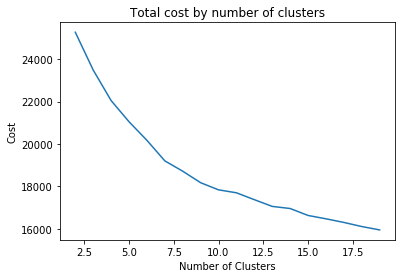

In [17]:
plt.plot(list(range(2,20)), cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Total cost by number of clusters')
plt.savefig('elbow.png', bbox_inches = 'tight')
plt.show()

Final model

In [20]:
kproto_final = KPrototypes(n_jobs = -1, n_clusters = 10, init = 'Huang', random_state = 42)
kproto_final.fit(df_train_final_np, categorical = cat_cols)

KPrototypes(gamma=0.14280983584531962, init='Huang', n_clusters=10, n_jobs=-1,
            random_state=42)

In [21]:
df_train['cluster'] = kproto_final.predict(df_train_final_np, categorical = cat_cols)
df_val['cluster'] = kproto_final.predict(df_val_final_np, categorical = cat_cols)

In [34]:
df_train.to_csv('train_data_cluster.csv', index = False)
df_val.to_csv('val_data_cluster.csv', index = False)

Cluster analysis

In [32]:
print(f"Model cost: {round(kproto_final.cost_, 2)}")

Model cost: 17834.86


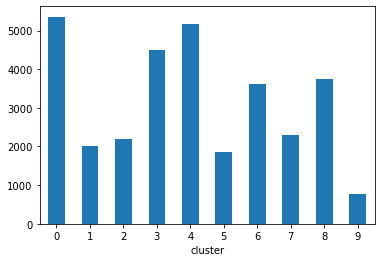

In [35]:
df_train.groupby('cluster')['id'].count().plot.bar(rot = 0)
plt.show()

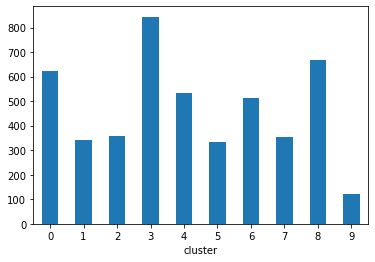

In [36]:
df_val.groupby('cluster')['id'].count().plot.bar(rot = 0)
plt.show()